<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-DataFrames-from-pickle" data-toc-modified-id="Reading-DataFrames-from-pickle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading DataFrames from pickle</a></span></li><li><span><a href="#Featuring" data-toc-modified-id="Featuring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Featuring</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Tratamiento-de-fechas" data-toc-modified-id="Tratamiento-de-fechas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tratamiento de fechas</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train-Test split</a></span></li><li><span><a href="#Scaler" data-toc-modified-id="Scaler-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Scaler</a></span></li></ul></li><li><span><a href="#Models-for-Total-Generation" data-toc-modified-id="Models-for-Total-Generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models for Total Generation</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#K-Neighbors" data-toc-modified-id="K-Neighbors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-Neighbors</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#K-Neighbors-Bagging-Model" data-toc-modified-id="K-Neighbors-Bagging-Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>K-Neighbors Bagging Model</a></span></li><li><span><a href="#Boosting-Models" data-toc-modified-id="Boosting-Models-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Boosting Models</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation-for-Total-Generation" data-toc-modified-id="Evaluation-for-Total-Generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation for Total Generation</a></span><ul class="toc-item"><li><span><a href="#Model-choice" data-toc-modified-id="Model-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model choice</a></span></li><li><span><a href="#Real-vs-prediction-comparation" data-toc-modified-id="Real-vs-prediction-comparation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Real vs prediction comparation</a></span></li></ul></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></div>

In [7]:
# If the code is executed from Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/TFM_Generacion_electrica_AEMET/Python                                                                         

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/TFM_Generacion_electrica_AEMET/Python'
/content/drive/My Drive/TFM_Generacion_electrica_AEMET/Python


In [8]:
# Instalacion libreria AEMET para ingesta de datos
!pip install python-aemet

In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from utils import date_transform,evaluation_function,plot_metrics,plot_real_vs_pred,train_test_val_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns=None
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_style("ticks")

path_Data='../Data/'

# Reading DataFrames from pickle

In [3]:
df_ree_weather=pd.read_pickle(path_Data+"Wheater_ree.pkl")

In [4]:
df_ree_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7480 entries, 0 to 7479
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7480 non-null   object 
 1   system                     7480 non-null   object 
 2   Holiday                    7480 non-null   int64  
 3   weekday                    7480 non-null   int64  
 4   tmin                       7480 non-null   float64
 5   presMin                    7480 non-null   float64
 6   prec                       7480 non-null   float64
 7   tmed                       7480 non-null   float64
 8   sol                        7480 non-null   float64
 9   velmedia                   7480 non-null   float64
 10  tmax                       7480 non-null   float64
 11  presMax                    7480 non-null   float64
 12  racha                      7480 non-null   float64
 13  year                       7480 non-null   int64

# Featuring

## OneHotEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc_system=OneHotEncoder().fit(df_ree_weather[['system']])

df_transform_weather=enc_system.transform(df_ree_weather[['system']])

column_weather=enc_system.get_feature_names()

df_onehot_weather = pd.DataFrame(df_transform_weather.todense(),columns=column_weather)

     
df_weather_features=pd.merge(df_ree_weather,df_onehot_weather,left_index=True,right_index=True)                               
df_weather_features.drop('system',axis=1,inplace=True)
                               

In [6]:
df_weather_features.head()

,fecha,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,2016-01-01,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,3032.187,2277.467,69.160,11.053,0.0,0.000,0.000,1022.316,0.00,1.362,485.0490,485.0490,144.200,0.000,1286.835,0.000,0.000,0.927205,0.072795,1.0,0.0,0.0,0.0
1,2016-01-01,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000,7124.185,0.000,383.526,0.0,11.815,9.163,6026.826,0.00,26.995,0.0000,0.0000,697.304,0.000,160.570,5779.631,0.000,0.944174,0.055826,0.0,1.0,0.0,0.0
2,2016-01-01,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000,0.000,0.000,0.000,0.0,0.000,0.000,447.061,0.00,0.000,15.9025,15.9025,0.145,0.000,0.000,0.000,0.000,0.966499,0.033501,0.0,0.0,1.0,0.0
3,2016-01-01,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,24401.321,48452.794,41918.271,199437.416,0.0,0.000,29281.000,0.000,162745.22,7169.124,3848.0700,1179.2320,8179.808,695.552,0.000,0.000,9782.273,0.542084,0.457916,0.0,0.0,0.0,1.0
4,2016-01-02,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,3269.033,2433.496,90.243,26.863,0.0,0.000,0.000,1189.254,0.00,2.335,458.4040,458.4040,194.499,0.000,1313.080,0.000,0.000,0.927710,0.072290,1.0,0.0,0.0,0.0


##  Tratamiento de fechas

Para pasar las fechas aun formato en que el salto entre el ultimo dia de un mes y el primer dia del siguiente sea continuo, uso los cosenos de los dias y meses. 

Para ello situo los valores de los 31 dias en angulos iguales calulandolos como $Dia(x)=\cos\frac{2\pi}{31}x$

Para los meses situo cada mes en $Mes(x)=\cos\frac{2\pi}{12}x$

Y para los dias de la semana $Weekday(x)=\cos\frac{2\pi}{7}x$

In [7]:
df_weather_procesed=date_transform(df_weather_features);
df_weather_procesed.head()

,fecha,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,2016-01-01,1,-0.900969,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,7.608871,0.866025,0.979530,8814.678,3032.187,2277.467,69.160,11.053,0.0,0.000,0.000,1022.316,0.00,1.362,485.0490,485.0490,144.200,0.000,1286.835,0.000,0.000,0.927205,0.072795,1.0,0.0,0.0,0.0
1,2016-01-01,1,-0.900969,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,7.608871,0.866025,0.979530,20220.015,0.000,7124.185,0.000,383.526,0.0,11.815,9.163,6026.826,0.00,26.995,0.0000,0.0000,697.304,0.000,160.570,5779.631,0.000,0.944174,0.055826,0.0,1.0,0.0,0.0
2,2016-01-01,1,-0.900969,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,7.608871,0.866025,0.979530,479.011,0.000,0.000,0.000,0.000,0.0,0.000,0.000,447.061,0.00,0.000,15.9025,15.9025,0.145,0.000,0.000,0.000,0.000,0.966499,0.033501,0.0,0.0,1.0,0.0
3,2016-01-01,1,-0.900969,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,7.608871,0.866025,0.979530,537090.081,24401.321,48452.794,41918.271,199437.416,0.0,0.000,29281.000,0.000,162745.22,7169.124,3848.0700,1179.2320,8179.808,695.552,0.000,0.000,9782.273,0.542084,0.457916,0.0,0.0,0.0,1.0
4,2016-01-02,0,-0.222521,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,7.608871,0.866025,0.918958,9435.611,3269.033,2433.496,90.243,26.863,0.0,0.000,0.000,1189.254,0.00,2.335,458.4040,458.4040,194.499,0.000,1313.080,0.000,0.000,0.927710,0.072290,1.0,0.0,0.0,0.0


In [8]:
features_list=['Holiday','weekday','tmin','presMin','prec','sol','tmax','presMax','racha','velmedia','year','day','month','x0_baleares','x0_canarias','x0_melilla','x0_peninsular']
target_list=['Generacion_Mwh','x0_baleares','x0_canarias','x0_melilla','x0_peninsular']

## Train-Test split

In [9]:
X_train,X_test,y_train,y_test,X_validation,y_validacion=train_test_val_split(df_weather_procesed,
                                                                        features_list,
                                                                        target_list,
                                                                        .1,
                                                                        0)

In [10]:
X_train.shape

(6732, 17)

In [11]:
X_test.shape

(748, 17)

## Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

cols_scaler=['tmin','presMin','prec','sol','tmax','presMax','racha','velmedia']
scaler=StandardScaler().fit(X_train[cols_scaler])

X_train[cols_scaler]=scaler.transform(X_train[cols_scaler])
X_test[cols_scaler]=scaler.transform(X_test[cols_scaler])
X_train.head()

,Holiday,weekday,tmin,presMin,prec,sol,tmax,presMax,racha,velmedia,year,day,month,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,1,-0.900969,-1.136261,1.001632,-0.299348,-1.860133,-0.912298,0.989529,0.086529,-0.813986,7.608871,0.979530,0.866025,1.0,0.0,0.0,0.0
1,1,-0.900969,-0.427684,-1.208123,-0.305329,0.460875,-0.026751,1.022056,-0.660018,-0.508034,7.608871,0.979530,0.866025,0.0,1.0,0.0,0.0
2,1,-0.900969,-0.011780,1.142394,-0.305329,0.408077,-0.664014,0.693821,-1.603026,-1.305476,7.608871,0.979530,0.866025,0.0,0.0,1.0,0.0
3,1,-0.900969,-1.056619,-0.697798,1.168923,-1.767660,-1.319413,-1.406834,0.511217,-0.207171,7.608871,0.979530,0.866025,0.0,0.0,0.0,1.0
4,0,-0.222521,-1.043838,0.945714,-0.305329,-1.479986,-0.614357,0.770705,1.874314,0.750589,7.608871,0.918958,0.866025,1.0,0.0,0.0,0.0


# Models for Total Generation

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression


reg_ln=LinearRegression()

reg_ln.fit(X_train,y_train['Generacion_Mwh'])

y_pred_ln=reg_ln.predict(X_test)


## K-Neighbors

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_KN={"n_neighbors":np.arange(3,100)}

reg_KN=GridSearchCV(KNeighborsRegressor(),param_grid=param_KN,scoring='neg_mean_squared_error')
reg_KN.fit(X_train,y_train['Generacion_Mwh'])
y_pred_KN=reg_KN.predict(X_test)
reg_KN.best_params_

{'n_neighbors': 16}

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

params_DT={'max_depth':range(3,10),'min_samples_leaf':range(1,5)}

reg_DT=GridSearchCV(DecisionTreeRegressor(random_state=7),param_grid=params_DT,scoring='neg_mean_squared_error')
reg_DT.fit(X_train,y_train['Generacion_Mwh'])
y_pred_DT=reg_DT.predict(X_test)
reg_DT.best_params_

{'max_depth': 5, 'min_samples_leaf': 4}

## K-Neighbors Bagging Model

In [16]:
from sklearn.ensemble import BaggingRegressor

params_BKN={
    "base_estimator__n_neighbors":np.arange(3,20),
    "n_estimators":np.arange(3,20),
    "max_features":np.arange(.5,1,.1)
}

reg_BKN=GridSearchCV(BaggingRegressor(KNeighborsRegressor()),param_grid=params_BKN,scoring='neg_mean_squared_error')

reg_BKN.fit(X_train,y_train['Generacion_Mwh'])
y_pred_BKN=reg_BKN.predict(X_test)
reg_BKN.best_params_

{'base_estimator__n_neighbors': 13,
 'max_features': 0.8999999999999999,
 'n_estimators': 17}

## Boosting Models


### XGBoost

In [18]:
from xgboost import XGBRegressor

params_xgb={
    'max_depth':range(3,6),
    'n_estimators':range(60,80,1),
    'learning_rate':np.arange(.11,.13,.005),
    'subsample':np.arange(.4,0.6,0.05),
    'colsample_bytree':np.arange(.5,1,0.1)
    }

reg_XGB=GridSearchCV(XGBRegressor(objective='reg:squarederror',random_state=7),param_grid=params_xgb,scoring='neg_mean_squared_error')

reg_XGB.fit(X_train,y_train['Generacion_Mwh'])
y_pred_XGB=reg_XGB.predict(X_test)

print(reg_XGB.best_params_)
print(reg_XGB.best_estimator_)
print(reg_XGB.best_score_)

{'colsample_bytree': 0.6, 'learning_rate': 0.11, 'max_depth': 3, 'n_estimators': 79, 'subsample': 0.5}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.11, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=79, n_jobs=8, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
-957728452.1265872


### LightGBM

In [19]:
from lightgbm import LGBMRegressor

params_LGBM={
    'max_depth':range(3,6),
    'n_estimators':range(110,130,1),
    'learning_rate':np.arange(.09,.11,.005),
    'subsample':np.arange(.3,0.6,0.05),
    'colsample_bytree':np.arange(.5,1,0.1)
    }

reg_LGBM=GridSearchCV(LGBMRegressor(random_state=7),param_grid=params_LGBM,scoring='neg_mean_squared_error')

reg_LGBM.fit(X_train,y_train['Generacion_Mwh'])
y_pred_LGBM=reg_LGBM.predict(X_test)

print(reg_LGBM.best_params_)
print(reg_LGBM.best_estimator_)
print(reg_LGBM.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 128, 'subsample': 0.3}
LGBMRegressor(colsample_bytree=0.5, learning_rate=0.09, max_depth=5,
              n_estimators=128, random_state=7, subsample=0.3)
-813502262.8682632


# Evaluation for Total Generation


## Model choice

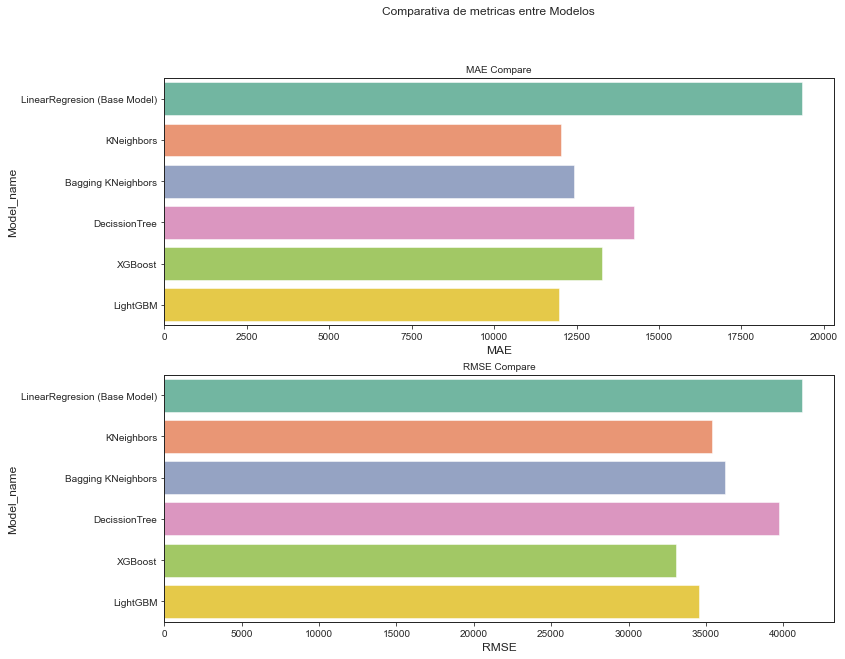

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

pd_ln=evaluation_function(y_test['Generacion_Mwh'],y_pred_ln,'LinearRegresion (Base Model)')
pd_kn=evaluation_function(y_test['Generacion_Mwh'],y_pred_KN,'KNeighbors')
pd_bkn=evaluation_function(y_test['Generacion_Mwh'],y_pred_BKN,'Bagging KNeighbors')
pd_DT=evaluation_function(y_test['Generacion_Mwh'],y_pred_DT,'DecissionTree')
pd_XGB=evaluation_function(y_test['Generacion_Mwh'],y_pred_XGB,'XGBoost')
pd_LGBM=evaluation_function(y_test['Generacion_Mwh'],y_pred_LGBM,'LightGBM')

plot_metrics([pd_ln,pd_kn,pd_bkn,pd_DT,pd_XGB,pd_LGBM])


## Real vs prediction comparation

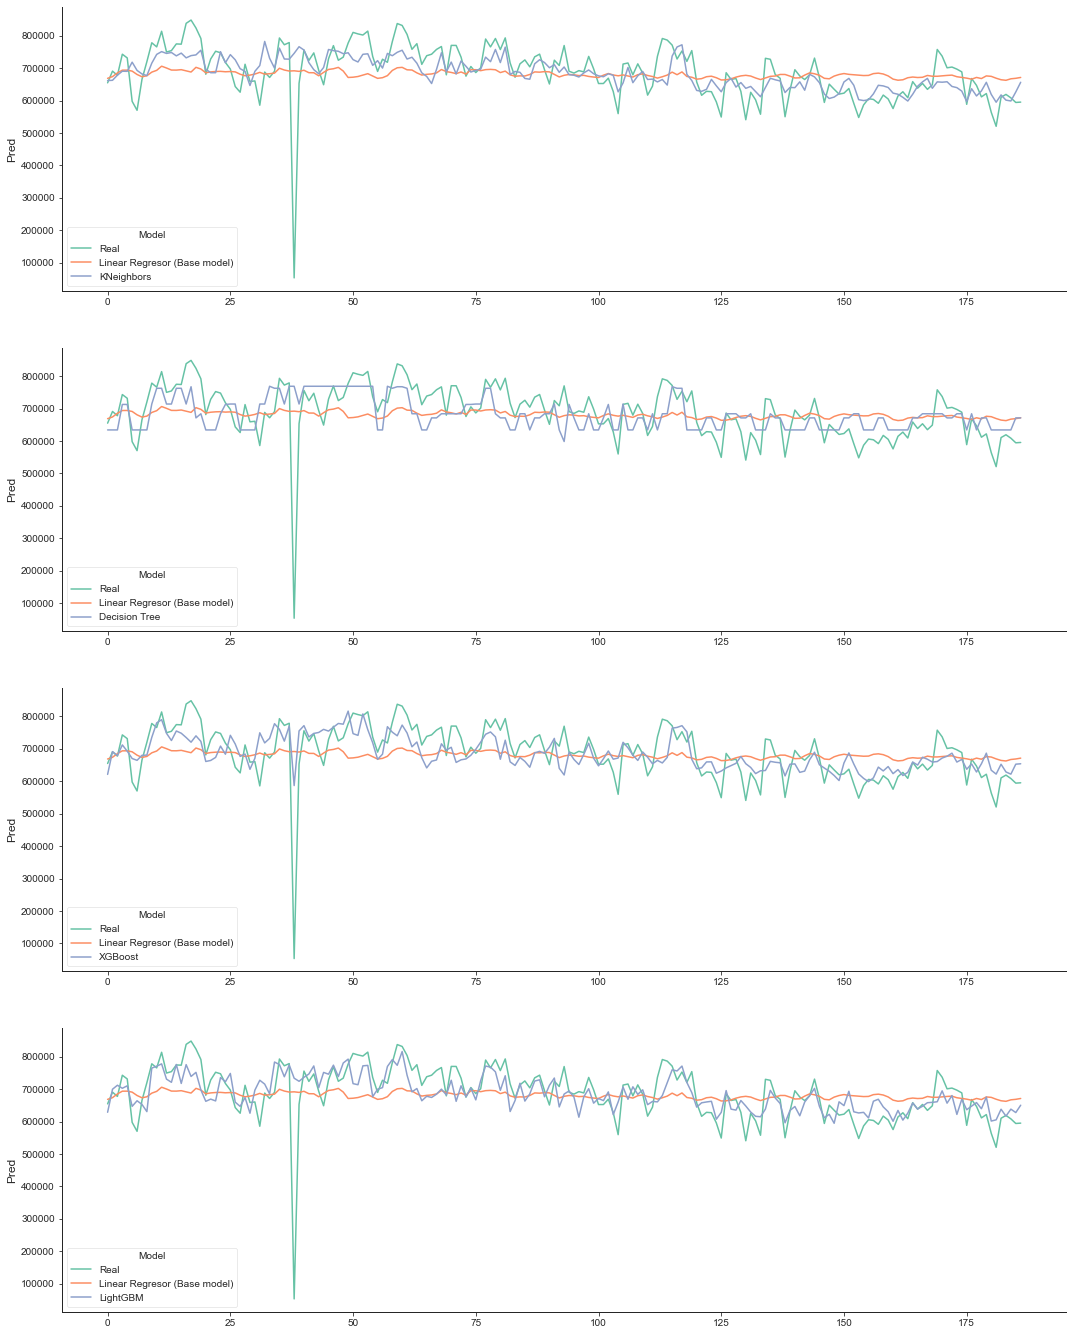

In [22]:
plot_real_vs_pred('x0_peninsular','Generacion_Mwh',X_test,y_test,reg_ln,reg_KN,reg_DT,reg_XGB,reg_LGBM)

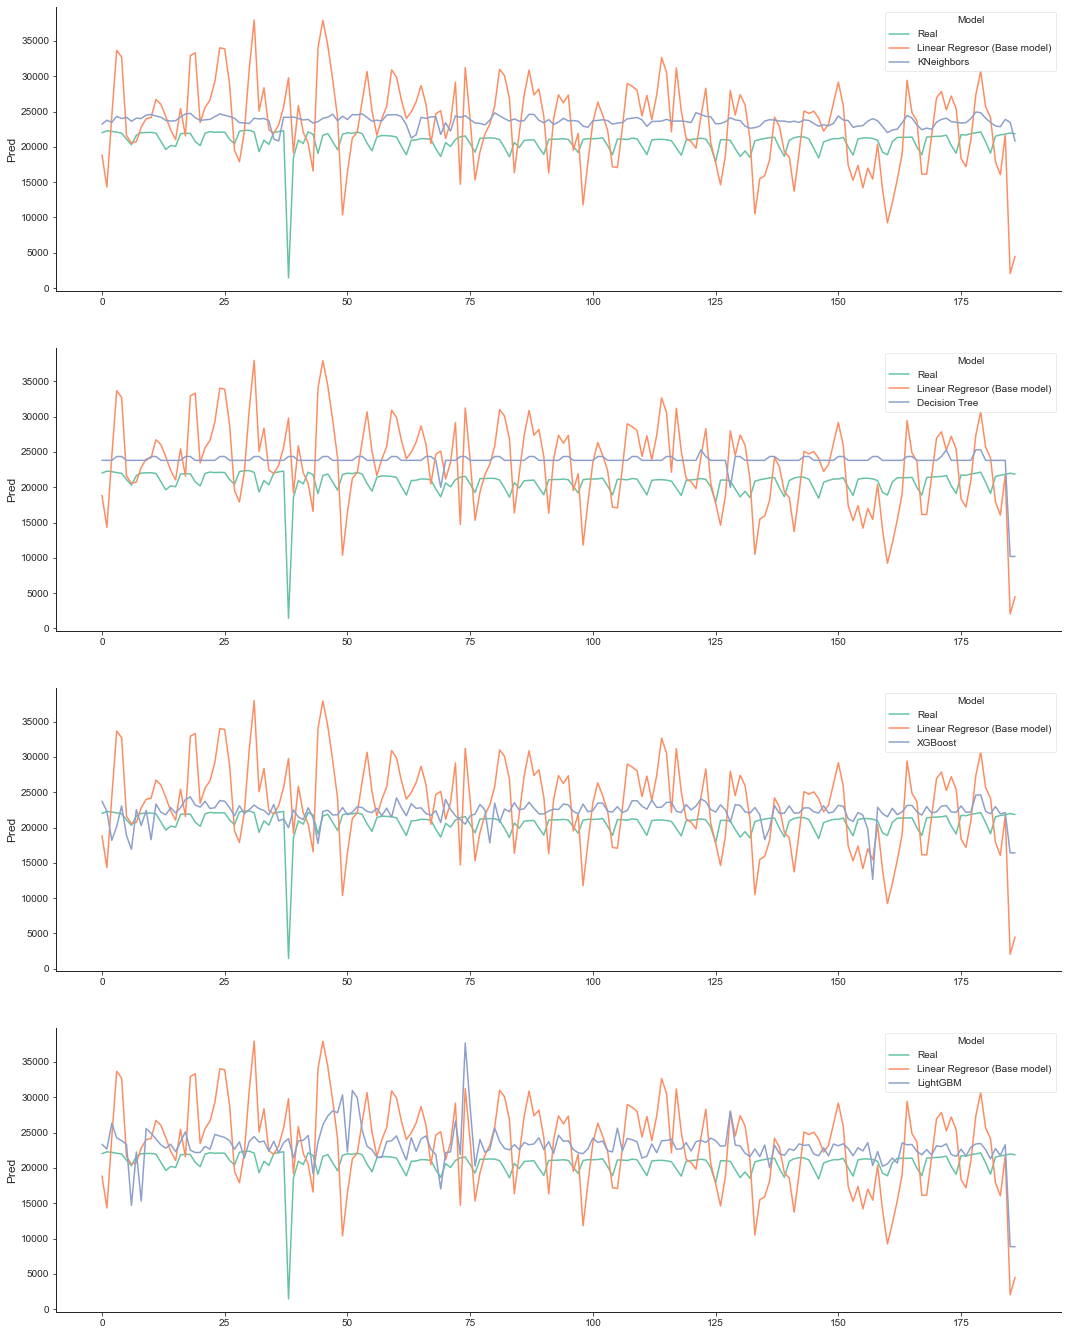

In [23]:
plot_real_vs_pred('x0_canarias','Generacion_Mwh',X_test,y_test,reg_ln,reg_KN,reg_DT,reg_XGB,reg_LGBM)

# Pipeline

In [25]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

cols=['day','year','month','system','Holiday','weekday','tmin','tmed','presMin','prec','sol','velmedia','tmax','presMax','racha']

ct=ColumnTransformer(
    [
     ('enc',enc_system,['system']),
     ('date_transf',FunctionTransformer(date_transform),['day','year','month','weekday']),
     ('sc',StandardScaler(),['tmin','presMin','prec','sol','tmax','tmed','presMax','racha','velmedia'])
    ]
)

pipe_best_total=Pipeline(steps=[('ct',ct),('LGBM',LGBMRegressor(random_state=7))])


params_LGBM={
    'LGBM__max_depth':[5],
    'LGBM__n_estimators':[128],
    'LGBM__learning_rate':[.09],
    'LGBM__subsample':[.3],
    'LGBM__colsample_bytree':[.5]
    }

reg_LGBM=GridSearchCV(pipe_best_total,param_grid=params_LGBM,scoring='neg_mean_squared_error')

reg_LGBM.fit(df_ree_weather[cols],df_ree_weather['Generacion_Mwh'])

model_path='../models/'
joblib.dump(reg_LGBM, model_path+'best_model_Generation.sav')

['../models/best_model_Generation.sav']